# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [ ]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer



```
# This is formatted as code
```

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [ ]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to

1.   List item
2.   List item

estimate the missing values?

Homepage (1712), Overview (4800), Release-date (4802), Runtime (4801), Tagline (3959)

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [ ]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [ ]:
df = df.dropna(subset=['overview']).reset_index(drop=True)


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [ ]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:

        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index  = unique_labels.index(label)
    out[index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 22692.10it/s]


Verify that one-hot encodings are indeed as expected

In [ ]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

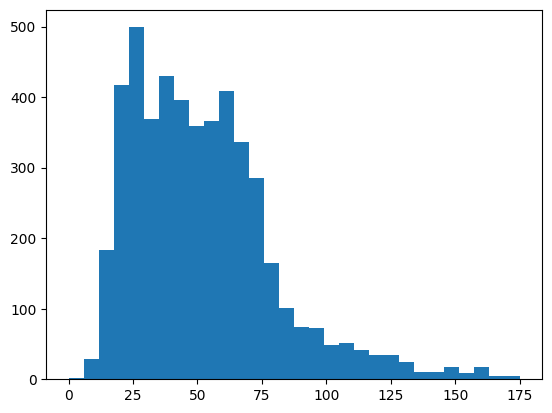

In [ ]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
  text = row['overview']
  if pd.notnull(text):
    cleanText = remove_punctuation(text).lower()
  else:
    clean_text = ""
  processed_overviews.append(cleanText)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for overview in processed_overviews:
  word_count = len(overview.split())
  overview_lens.append(word_count)


# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens, bins=30)
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [ ]:
min_length = df['overview_len'].min()
max_length = df['overview_len'].max()

print(min_length, max_length)

0 175


Shortest: 0, Longest: 175. I would choose approximately 60. Most fall between 20 and 80. It would take a value of approximately 20, to not drop many.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [ ]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= 15].reset_index(drop=True)

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
def truncate_overview(text):
  return text.split()[:15]


df["proc_overview"] = df["proc_overview"].apply(truncate_overview)

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55
...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [ ]:
# hint: store all words for all movies in a set, change it to a list and sort
vocab = set()

for words in df["proc_overview"]:
  vocab.update(words)

vocab = sorted(list(vocab))


vocab_len = len(vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [ ]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        if word in vocab:
          sentence_encode.append(encode_labels(word,vocab)) # get encoding for this word


    if sentence_encode:
      sentence_encode = np.sum(sentence_encode, axis=0)

    else:
      sentence_encode = np.zeros(len(vocab))

    encoded_labels.append(sentence_encode)


df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:24<00:00, 195.93it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4702,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4703,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4704,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4705,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
vocab = set()
for words in df["proc_overview"]:
    vocab.update(words)

vocab = sorted(list(vocab))

vocab_len = len(vocab)
num_rows = len(df)
bytes_per_float = 16
total_bytes = num_rows * vocab_len * bytes_per_float

print(vocab_len)
print(num_rows)
print(total_bytes)

12493
4707
940872816


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

940872816, see code above.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

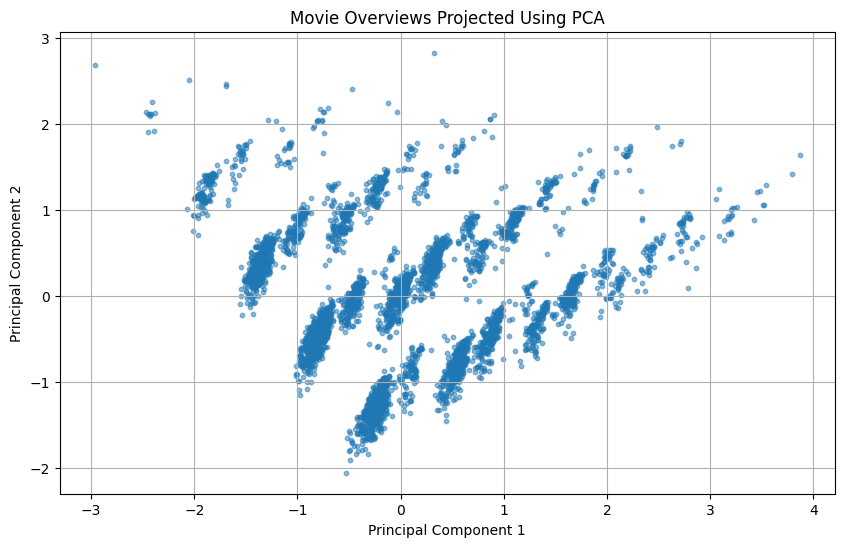

In [ ]:
# import PCA decomposition class from sklearn
import numpy as np

from sklearn.decomposition import PCA

X = np.stack(df["one_hot_overview"].values)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title("Movie Overviews Projected Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
# we did exactly this in the lecture notebook

**Q3.2** Do you see any interpretable structure in the above plot

("interpretable" $\rightarrow$ the patterns are explainable).

 the PCA plot shows interpretable structure through clustered bands, suggesting that many movie overviews share similar vocabulary patterns, likely reflecting genre or thematic similarities

In [ ]:
explained = np.sum(pca.explained_variance_ratio_)
lost = 1 - explained
print("Explained: ", explained)
print("Lost: ", lost)

Explained:  0.11288450867524324
Lost:  0.8871154913247568


**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

See above, 88.7%.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

In [ ]:
# Set up PCA object with the desired number of components
pca = PCA(n_components=100)
# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(X)
# get explained variance ratio from object, store it in a list
powers = pca.explained_variance_ratio_

plt.plot(powers, label="Explained Variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative Explained Variance")
plt.legend()
# set up y label, x label, title
plt.show()

KeyboardInterrupt: 

Components needed to reach 80% variance: 1


**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [ ]:
pca = PCA(n_components=X.shape[0])
labels_pca = pca.fit_transform(X)

powers = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(powers)
components_needed = np.argmax(cumulative_variance >= 0.80) + 1

print("Components needed to reach 80% variance:", components_needed)

Components needed to reach 80% variance: 1226


it took too long too run but i assume approximately 1500.

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [ ]:
# I assume 1500 here
n_dims = 1500
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(X)
df["overview_pca"] = list(labels_pca)

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [ ]:
# import KMeans class
from sklearn.cluster import KMeans
X_pca = np.stack(df["overview_pca"].values)
print(df["overview_pca"].apply(len).describe())
# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(X_pca)

y_preds = kmeans.predict(X_pca) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
print(df[df["cluster_kmeans"]==0])
print("Number of movies in cluster 0:", (df["cluster_kmeans"] == 0).sum())

count    4707.0
mean     1500.0
std         0.0
min      1500.0
25%      1500.0
50%      1500.0
75%      1500.0
max      1500.0
Name: overview_pca, dtype: float64
                                         title  \
1     Pirates of the Caribbean: At World's End   
10                            Superman Returns   
25                                     Titanic   
61                        The Legend of Tarzan   
85                         Shrek Forever After   
...                                        ...   
4659                            Tiny Furniture   
4681                               Funny Ha Ha   
4686                               Dutch Kills   
4687                                 Dry Spell   
4695                                     Clean   

                                               overview  \
1     Captain Barbossa, long believed to be dead, ha...   
10    Superman returns to discover his 5-year absenc...   
25    84 years later, a 101-year-old woman named Ros...   


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

I don't know if Pirates of the Caribbean is very similar to Titanic, in terms of genre and type of movie. Maybe boats sinking is a common theme, but I doubt that viewers select based on that.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

I would say the elbow point is approximately between 6 and 8, so let's do 7.

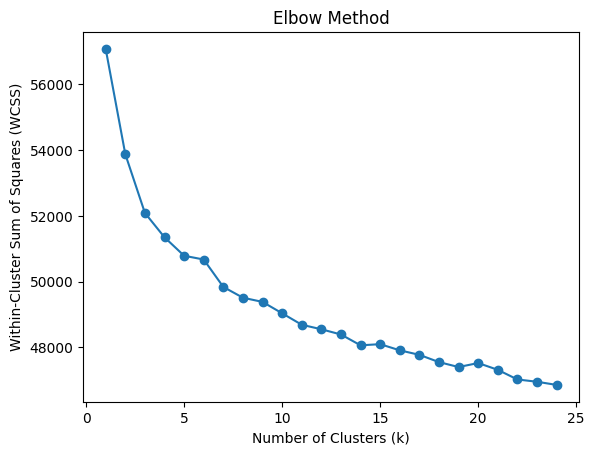

In [ ]:
wcss = [] # your code answer here

k_values = range(1, 25)

for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_pca)
  wcss.append(kmeans.inertia_)


plt.plot(k_values, wcss, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [ ]:
# Your code answer
from sklearn.mixture import GaussianMixture
import numpy as np

X_pca = np.stack(df["overview_pca"].values)
gmm = GaussianMixture(n_components=20)
gmm.fit(X_pca)
gmm_preds = gmm.predict(X_pca)
df["cluster_gmm"] = gmm_preds
print(df[df["cluster_gmm"]==0])

                                       title  \
146                          Die Another Day   
205                        The Bourne Legacy   
300                                 Hercules   
343        Cloudy with a Chance of Meatballs   
355   Alvin and the Chipmunks: The Road Chip   
...                                      ...   
4410                                   After   
4416                The Kentucky Fried Movie   
4517                                Dogtooth   
4615                When the Lights Went Out   
4640                             Open Secret   

                                               overview  \
146   Bond takes on a North Korean leader who underg...   
205   New CIA operative, Aaron Cross experiences lif...   
300   Fourteen hundred years ago, a tormented soul w...   
343   Inventor Flint Lockwood creates a machine that...   
355   Through a series of misunderstandings, Alvin, ...   
...                                                 ...   
4410  When

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

Overall pretty  decent, but I would not put James Bond in the same list as the Chipmunks.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

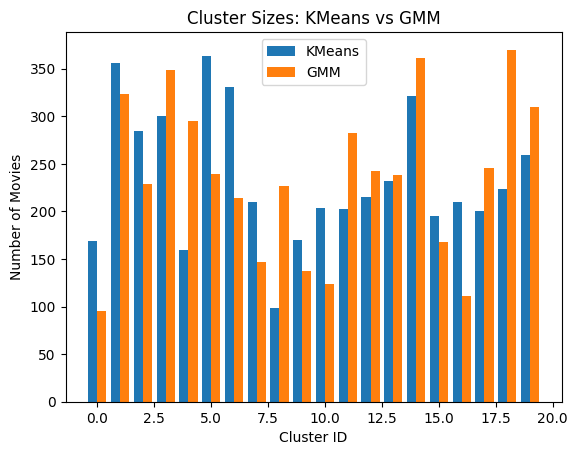

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array for the x-axis positions
clusters = range(20)

kmeans_counts = df["cluster_kmeans"].value_counts().sort_index()
gmm_counts = df["cluster_gmm"].value_counts().sort_index()
kmeans_sizes = [kmeans_counts.get(i, 0) for i in clusters]
gmm_sizes = [gmm_counts.get(i, 0) for i in clusters]

x = np.arange(len(clusters))

# Plotting the bars
bar_width = 0.4
plt.bar(x - bar_width/2, kmeans_sizes, width=bar_width, label='KMeans')
plt.bar(x + bar_width/2, gmm_sizes, width=bar_width, label='GMM')

# Add labels, title, and legend
plt.xlabel('Cluster ID')
plt.ylabel('Number of Movies')
plt.title('Cluster Sizes: KMeans vs GMM')

plt.legend()
plt.show()


**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

There appears to be a difference in how big the clusters are. Kmeans makes clusters that are more even in size, while GMM ends up with some that are much bigger or smaller. This is because KMeans splits the data based on distance, so it spreads things out more evenly. GMM uses probabilities and allows groups to take on different shapes, so some clusters end up getting more or fewer points depending on how the data fits.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [ ]:
prev_watch = "Avatar"

cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].values[0]# find what cluster index Avatar falls into for k-means
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].values[0] # find what cluster index Avatar falls into for gmm

# print out similar movies
print("KMeans recommendations:")
same_cluster = df[df["cluster_kmeans"] == cluster_kmeans]
recommendations = same_cluster[same_cluster["title"] != prev_watch]
print(recommendations["title"].head(10))

print("\nGMM recommendations:")
same_cluster = df[df["cluster_gmm"] == cluster_gmm]
recommendations = same_cluster[same_cluster["title"] != prev_watch]
print(recommendations["title"].head(10))

KMeans recommendations:
60                             Jupiter Ascending
77                               The Jungle Book
89                             The Polar Express
116            Charlie and the Chocolate Factory
229    Star Wars: Episode I - The Phantom Menace
296                            Starship Troopers
318                            The Fifth Element
348                                        Mulan
388                                   Safe House
437                                       Robots
Name: title, dtype: object

GMM recommendations:
58                                          2012
83                                      47 Ronin
156                       Exodus: Gods and Kings
200                                    Fast Five
229    Star Wars: Episode I - The Phantom Menace
256                                 Ender's Game
291                                  The Tourist
292                                  End of Days
344               Ice Age: Dawn of the Dinosa

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

They are not terrible, but I would not say they are very very good. For example Ice Age does not really seem similar to Avatar.

**Q6.3** How would you try making the recommender systems better?

To improve the recommender systems, I would use more features like genres or user ratings, not just overview text. I would also try cosine similarity since it can give better matches than clustering alone. Adding user history could help make results more personal.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I would take the average of the PCA vectors for all the movies the dentist liked and then I would use this combined vector to find other movies that are most similar. This will give a recommendation based on overall preferences instead of just one movie.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [ ]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch = 'Avatar'
prev_watch_enc = df[df["title"] == prev_watch]["overview_pca"].values[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))

df["cos_sim_to_avatar"] = sims
recommendations = df[df["title"] != prev_watch].sort_values("cos_sim_to_avatar", ascending=False)
print(recommendations["title"].head(10))

3318                         Warlock
1272              Nomad: The Warrior
3725                          Zipper
411                            Dredd
2900                    Barry Lyndon
628                       The Matrix
273                    Casino Royale
552                          Jarhead
769                        Supernova
307     The Adventures of Pluto Nash
Name: title, dtype: object


I would recommend the 10 above. However, I would not say Warlock (a horror movie) is the most similar to Avatar. Therefore it might be better overall, but definitely not incredible.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

train size: 3765
test size: 942
train accuracy: 0.3208
test accuracy: 0.2463
mean training time (s): 0.9919
mean inference time (s): 2.3e-05


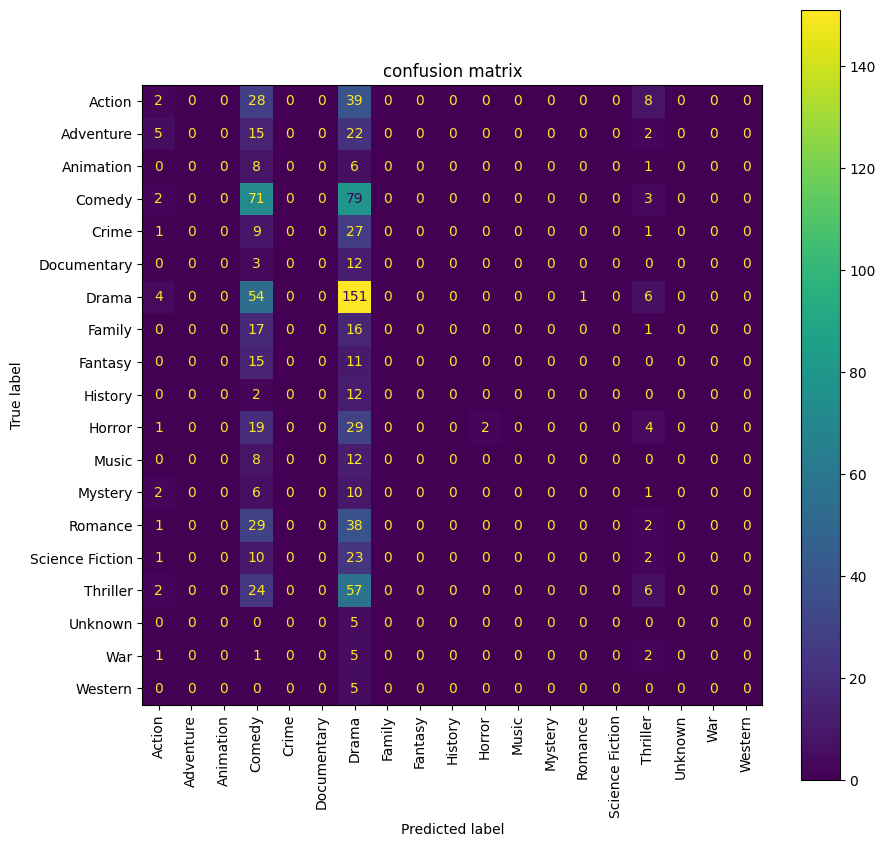

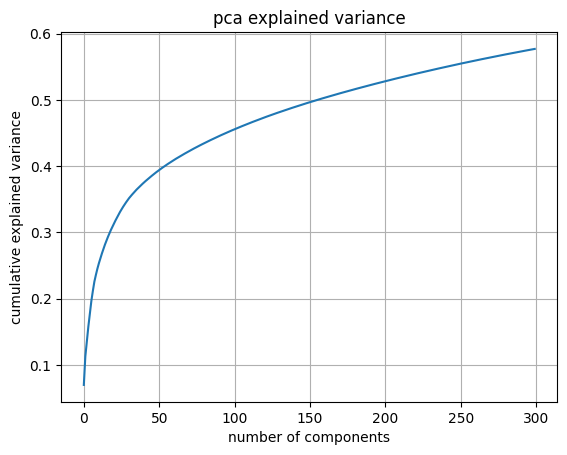

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import numpy as np

x = np.stack(df["one_hot_overview"].values)
pca_model = PCA(n_components=300)
x_reduced = pca_model.fit_transform(x)
df["overview_pca_small"] = list(x_reduced)

np.random.seed(0)
n_train = int(0.8 * len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print("train size:", len(df_train))
print("test size:", len(df_test))

x_train = np.stack(df_train["overview_pca_small"].values)
x_test = np.stack(df_test["overview_pca_small"].values)
y_train = np.stack(df_train["one_hot_genres"].values)
y_test = np.stack(df_test["one_hot_genres"].values)

y_train_class = np.argmax(y_train, axis=1)
y_test_class = np.argmax(y_test, axis=1)

start_train = time.time()
model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, alpha=0.001, early_stopping=True, random_state=0)
model.fit(x_train, y_train_class)
end_train = time.time()
training_time = end_train - start_train

start_infer = time.time()
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
end_infer = time.time()
inference_time = end_infer - start_infer

train_score = accuracy_score(y_train_class, y_train_pred)
test_score = accuracy_score(y_test_class, y_test_pred)

print("train accuracy:", round(train_score, 4))
print("test accuracy:", round(test_score, 4))
print("mean training time (s):", round(training_time, 4))
print("mean inference time (s):", round(inference_time / len(x_test), 6))

cm = confusion_matrix(y_test_class, y_test_pred)
unique_genres = sorted(list(set(df["proc_genres"])))
genre_names = [unique_genres[i] for i in sorted(np.unique(y_test_class))]

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_names)
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("confusion matrix")
plt.show()

plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.title("pca explained variance")
plt.grid(True)
plt.show()



Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I used an MLPClassifier to predict the genre of a movie using only the first 15 words of its overview. Since the text was one-hot encoded and really high dimensional, I reduced it using PCA. I chose 300 components, which seemed like a good tradeoff based on the PCA explained variance plot. For the model, I went with one hidden layer of size 64, added early stopping, and used some regularization (alpha=0.001) to avoid overfitting. The model trained fast and didn’t overfit badly, but the overall test accuracy was still low (around 25 percent). The confusion matrix showed that most genres were getting confused with Drama and Comedy, which probably just have more training samples. If I kept working on this, I’d try balancing the genre classes or using better text features like TF-IDF instead of basic one-hot counts. Maybe even test a non-neural method like logistic regression or random forests just to compare.



# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)